In [67]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
#getting data from the url
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36',"Accept-Encoding":"gzip, deflate","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8","DNT":"1","Connection":"close","Upgrade-Insecure-Requests":"1"}
def getsoup(url):
    response = requests.get(url,headers=headers)
    print(response)
    data = response.text
    soup = BeautifulSoup(data,'html.parser')
    return soup

In [3]:
#scraping book links from the webpage
url = "https://www.amazon.com/Best-Sellers-Books/zgbs/books"
soup2 = getsoup(url)
tags = []
for d in soup2.find_all("div",{"class":"a-column a-span12 a-text-center _cDEzb_grid-column_2hIsc"}):
    tag = d.find("a",{"class":"a-link-normal"})
    tags.append(tag)
books = []
tags = list(set(tags))
for tag in tags:
    book = "https://www.amazon.com" + tag.get("href")
    books.append(book)

<Response [200]>


In [4]:
#getting title, author, year of publication, and categories information for each book
titles = []
authors = []
years = []
listed_in = []
for book in books:
    b_soup = getsoup(book)
    title = b_soup.find("span",{"class":"a-size-extra-large"})
    titles.append(title.text)
    author = b_soup.find("a",{"class":"a-link-normal contributorNameID"})
    if author is None:
        author = b_soup.find("a",{"class":"a-link-normal"})
    authors.append(author.text)
    year = b_soup.find("span",{"class":"a-size-large a-color-secondary"})
    years.append(year.text)
    parent = b_soup.find("div",{"class":"a-section feature detail-bullets-wrapper bucket"})
    second = parent.find_all("ul")[1]
    t = second.find("ul",{"class":"a-unordered-list a-nostyle a-vertical zg_hrsr"}).find_all("a")
    cats = []
    for i in t:
        cats.append(i.text)
    category = ",".join(cats)
    listed_in.append(category)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [5]:
titles

[' Live Wire: Long-Winded Short Stories ',
 ' Where the Crawdads Sing ',
 ' Faith Still Moves Mountains: Miraculous Stories of the Healing Power of Prayer ',
 ' The Seven Husbands of Evelyn Hugo: A Novel ',
 ' It Starts with Us: A Novel (2) (It Ends with Us) ',
 ' Reminders of Him: A Novel ',
 ' The Body Keeps the Score: Brain, Mind, and Body in the Healing of Trauma ',
 ' Brown Bear, Brown Bear, What Do You See? ',
 ' The Boys from Biloxi: A Legal Thriller ',
 ' Harry Potter and the Order of the Phoenix: The Illustrated Edition (Harry Potter, Book 5) (Illustrated edition) ',
 ' The 48 Laws of Power ',
 ' Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones ',
 ' Diper Överlöde (Diary of a Wimpy Kid Book 17) ',
 " Little Blue Truck's Halloween: A Halloween Book for Kids ",
 ' The Very Hungry Caterpillar ',
 ' Our Missing Hearts: A Novel ',
 ' I Love You to the Moon and Back ',
 " I'm Glad My Mom Died ",
 ' Busy Betty ',
 " I'm So Glad You Were Born: Celebrating Who

In [6]:
authors

['Kelly Ripa',
 'Delia Owens',
 '\n                Books\n            ',
 'Taylor Jenkins Reid',
 'Colleen Hoover',
 'Colleen Hoover',
 'Bessel van der Kolk M.D.',
 '\n                Books\n            ',
 'John Grisham',
 'J. K. Rowling',
 'Robert Greene',
 'James Clear',
 'Jeff Kinney',
 'Alice Schertle',
 'Eric Carle',
 'Celeste Ng',
 'Amelia Hepworth',
 '\n                Books\n            ',
 'Reese Witherspoon',
 'Ainsley Earhardt',
 'Colleen Hoover',
 'Stephen King',
 'Sandra Boynton',
 'Crystal Radke',
 'Colleen Hoover',
 'Colleen Hoover',
 'Maggie Haberman',
 'Joanna Quinn',
 'Jodi Picoult',
 'Yung Pueblo']

In [7]:
years

[' Hardcover – September 27, 2022 ',
 ' Paperback – March 30, 2021 ',
 ' Hardcover – November 15, 2022 ',
 ' Paperback – May 29, 2018 ',
 ' Paperback – October 18, 2022 ',
 ' Paperback – January 18, 2022 ',
 ' Paperback – September 8, 2015 ',
 ' Board book – September 15, 1996 ',
 ' Hardcover – October 18, 2022 ',
 ' Hardcover – Illustrated, October 11, 2022 ',
 ' Paperback – September 1, 2000 ',
 ' Hardcover – October 16, 2018 ',
 ' Hardcover – October 25, 2022 ',
 ' Board book – Lift the flap, July 5, 2016 ',
 ' Board book – Illustrated, March 23, 1994 ',
 ' Hardcover – October 4, 2022 ',
 ' Board book – Illustrated, March 3, 2015 ',
 ' Hardcover – August 9, 2022 ',
 ' Hardcover – Picture Book, October 4, 2022 ',
 ' Hardcover – Picture Book, September 27, 2022 ',
 ' Paperback – August 2, 2016 ',
 ' Hardcover – September 6, 2022 ',
 ' Board book – Illustrated, July 25, 2017 ',
 ' Paperback – August 27, 2019 ',
 ' Paperback – October 26, 2021 ',
 ' Paperback – August 5, 2014 ',
 ' Hard

In [8]:
listed_in

['Humor Essays (Books),Television Performer Biographies,Actor & Entertainer Biographies',
 'Coming of Age Fiction (Books),Mothers & Children Fiction,Literary Fiction (Books)',
 'Biographies of People with Disabilities (Books),Religious Leader Biographies,Inspiration & Spirituality',
 'Contemporary Women Fiction,Family Life Fiction (Books),Contemporary Romance (Books)',
 'New Adult & College Romance (Books),Contemporary Romance (Books),Contemporary Women Fiction',
 'Family Life Fiction (Books),Contemporary Women Fiction,Contemporary Romance (Books)',
 'Psychiatry (Books),Popular Psychology Pathologies,Post-traumatic Stress Disorder',
 "Children's Colors Books,Children's Classics,Children's Bear Books (Books)",
 'Political Thrillers (Books),American Literature (Books),Suspense Thrillers',
 "Children's Fantasy & Magic Books,Children's Friendship Books,Children's Action & Adventure Books (Books)",
 'History & Theory of Politics,Business Motivation & Self-Improvement (Books),Success Self-He

In [9]:
#converting the four lists above to dataframe
d = {"Title":titles,"Author":authors,"Date":years,"Categories":listed_in}
bestselling = pd.DataFrame(d)
bestselling.head()

,Title,Author,Date,Categories
0,Live Wire: Long-Winded Short Stories,Kelly Ripa,"Hardcover – September 27, 2022","Humor Essays (Books),Television Performer Biog..."
1,Where the Crawdads Sing,Delia Owens,"Paperback – March 30, 2021","Coming of Age Fiction (Books),Mothers & Childr..."
2,Faith Still Moves Mountains: Miraculous Stori...,\n Books\n,"Hardcover – November 15, 2022",Biographies of People with Disabilities (Books...
3,The Seven Husbands of Evelyn Hugo: A Novel,Taylor Jenkins Reid,"Paperback – May 29, 2018","Contemporary Women Fiction,Family Life Fiction..."
4,It Starts with Us: A Novel (2) (It Ends with ...,Colleen Hoover,"Paperback – October 18, 2022","New Adult & College Romance (Books),Contempora..."


In [10]:
#creating a csv file for bestselling books
bestselling.to_csv("bestselling.csv")

In [19]:
#splitting the Date column into two: Type and Date
n_list = []
o_list = []
for date in bestselling["Date"]:
    spl = date.split('–')
    n_list.append(spl[0])
    o_list.append(spl[1])

In [22]:
bestselling["Type"] = n_list

In [23]:
bestselling["Date"] = o_list

In [34]:
#stripping excess whitespaces in the dataframe
bestselling = bestselling.applymap(lambda x: x.strip())

In [39]:
bestselling

,Title,Author,Date,Categories,Type
0,Live Wire: Long-Winded Short Stories,Kelly Ripa,"September 27, 2022","Humor Essays (Books),Television Performer Biog...",Hardcover
1,Where the Crawdads Sing,Delia Owens,"March 30, 2021","Coming of Age Fiction (Books),Mothers & Childr...",Paperback
2,Faith Still Moves Mountains: Miraculous Storie...,Books,"November 15, 2022",Biographies of People with Disabilities (Books...,Hardcover
3,The Seven Husbands of Evelyn Hugo: A Novel,Taylor Jenkins Reid,"May 29, 2018","Contemporary Women Fiction,Family Life Fiction...",Paperback
4,It Starts with Us: A Novel (2) (It Ends with Us),Colleen Hoover,"October 18, 2022","New Adult & College Romance (Books),Contempora...",Paperback
5,Reminders of Him: A Novel,Colleen Hoover,"January 18, 2022","Family Life Fiction (Books),Contemporary Women...",Paperback
6,"The Body Keeps the Score: Brain, Mind, and Bod...",Bessel van der Kolk M.D.,"September 8, 2015","Psychiatry (Books),Popular Psychology Patholog...",Paperback
7,"Brown Bear, Brown Bear, What Do You See?",Books,"September 15, 1996","Children's Colors Books,Children's Classics,Ch...",Board book
8,The Boys from Biloxi: A Legal Thriller,John Grisham,"October 18, 2022","Political Thrillers (Books),American Literatur...",Hardcover
9,Harry Potter and the Order of the Phoenix: The...,J. K. Rowling,"Illustrated, October 11, 2022","Children's Fantasy & Magic Books,Children's Fr...",Hardcover


In [40]:
#filling in 'Books' values in Author column
bestselling.at[2,'Author'] = "Harris Faulkner"
bestselling.at[7,'Author'] = "Bill Martin"
bestselling.at[17,"Author"] = "Jennette Mccurdy"

In [41]:
bestselling

,Title,Author,Date,Categories,Type
0,Live Wire: Long-Winded Short Stories,Kelly Ripa,"September 27, 2022","Humor Essays (Books),Television Performer Biog...",Hardcover
1,Where the Crawdads Sing,Delia Owens,"March 30, 2021","Coming of Age Fiction (Books),Mothers & Childr...",Paperback
2,Faith Still Moves Mountains: Miraculous Storie...,Harris Faulkner,"November 15, 2022",Biographies of People with Disabilities (Books...,Hardcover
3,The Seven Husbands of Evelyn Hugo: A Novel,Taylor Jenkins Reid,"May 29, 2018","Contemporary Women Fiction,Family Life Fiction...",Paperback
4,It Starts with Us: A Novel (2) (It Ends with Us),Colleen Hoover,"October 18, 2022","New Adult & College Romance (Books),Contempora...",Paperback
5,Reminders of Him: A Novel,Colleen Hoover,"January 18, 2022","Family Life Fiction (Books),Contemporary Women...",Paperback
6,"The Body Keeps the Score: Brain, Mind, and Bod...",Bessel van der Kolk M.D.,"September 8, 2015","Psychiatry (Books),Popular Psychology Patholog...",Paperback
7,"Brown Bear, Brown Bear, What Do You See?",Bill Martin,"September 15, 1996","Children's Colors Books,Children's Classics,Ch...",Board book
8,The Boys from Biloxi: A Legal Thriller,John Grisham,"October 18, 2022","Political Thrillers (Books),American Literatur...",Hardcover
9,Harry Potter and the Order of the Phoenix: The...,J. K. Rowling,"Illustrated, October 11, 2022","Children's Fantasy & Magic Books,Children's Fr...",Hardcover


In [43]:
bestselling.isnull().sum()

Title         0
Author        0
Date          0
Categories    0
Type          0
dtype: int64

#### No null value

In [44]:
bestselling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       30 non-null     object
 1   Author      30 non-null     object
 2   Date        30 non-null     object
 3   Categories  30 non-null     object
 4   Type        30 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


#### All columns are object datatypes

In [46]:
bestselling.describe(include='object').T

,count,unique,top,freq
Title,30,30,Fairy Tale,1
Author,30,26,Colleen Hoover,5
Date,30,26,"October 4, 2022",4
Categories,30,30,"Children's Classics,Children's Bug & Spider Bo...",1
Type,30,3,Hardcover,15


#### There are repeated authors and dates. 
#### There are also 3 unique book types. 
#### Hardcover is the most frequent book type with a count of 15.

### DATA VISUALIZATION

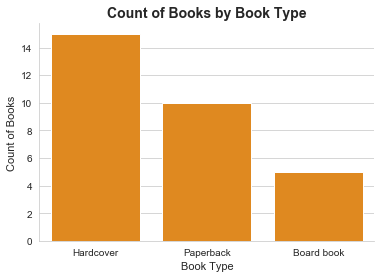

In [68]:
count = sns.countplot("Type",data=bestselling,color="darkorange")
plt.title("Count of Books by Book Type", fontsize=14, fontweight='bold')
plt.xlabel("Book Type", fontsize=11)
plt.ylabel("Count of Books", fontsize=11)
count.spines["right"].set_visible(False)
count.spines["top"].set_visible(False)
plt.show()

#### There are 15 hardcover books, 10 paperback books and 5 board books in the dataset

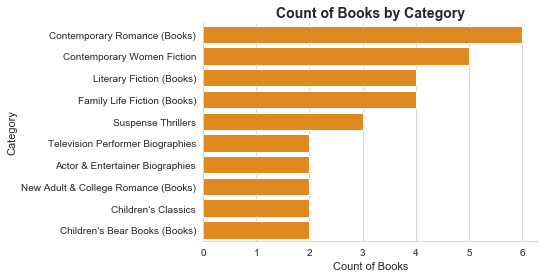

In [78]:
diction = {} #creating an empty dictionary.
for entry in bestselling["Categories"]: #iterating through the categories column
    if ',' in entry:
        for sub_value in entry.split(','): #splitting each iteration if there is a comma present in it.
            sub_value = sub_value.strip() #trimming each split value in the formed list. split() returns a list.
            if sub_value in diction: #checking if the trimmed value is in the dictionary outside the loop. If it's there, the value is increased by one.
                diction[sub_value] += 1
            else: #adding it to the dictionary with a starting value of one if it is not in the dictionary.
                diction[sub_value] = 1
    else: #if no comma in the entry.
        if entry in diction:
            diction[entry] += 1
        else:
            diction[entry] = 1
keys = sorted(diction, key=diction.get, reverse=True)[:10] 
val = [diction[i] for i in keys] #retrieving the values for each element in the sliced list.
#plotting
bar = sns.barplot(val,keys,color='darkorange')
plt.title("Count of Books by Category", fontsize=14, fontweight='bold')
plt.xlabel("Count of Books", fontsize=11)
plt.ylabel("Category", fontsize=11)
bar.spines["right"].set_visible(False)
bar.spines["top"].set_visible(False)
plt.show()

#### Contemporary Romance (Books) category has the highest count of books. Six bestselling books are listed in it.

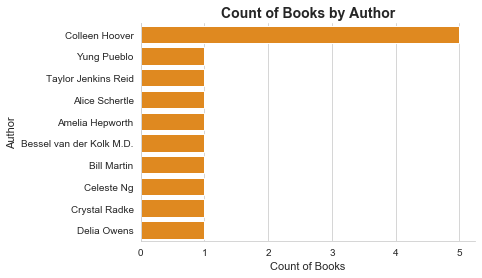

In [87]:
ser = bestselling.groupby("Author")["Title"].count().sort_values(ascending=False)[:10]
bar = sns.barplot(ser.values,ser.index,color='darkorange')
plt.title("Count of Books by Author", fontsize=14, fontweight='bold')
plt.xlabel("Count of Books", fontsize=11)
plt.ylabel("Author", fontsize=11)
bar.spines["right"].set_visible(False)
bar.spines["top"].set_visible(False)
plt.show()

#### Colleen Hoover has the highest count of books in the dataset (5).

In [91]:
bestselling[bestselling["Author"] == 'Colleen Hoover'].reset_index(drop=True)

,Title,Author,Date,Categories,Type
0,It Starts with Us: A Novel (2) (It Ends with Us),Colleen Hoover,"October 18, 2022","New Adult & College Romance (Books),Contempora...",Paperback
1,Reminders of Him: A Novel,Colleen Hoover,"January 18, 2022","Family Life Fiction (Books),Contemporary Women...",Paperback
2,It Ends with Us: A Novel (1),Colleen Hoover,"August 2, 2016","Contemporary Romance (Books),Women's Domestic ...",Paperback
3,Verity,Colleen Hoover,"October 26, 2021","Psychological Thrillers (Books),Contemporary R...",Paperback
4,Ugly Love: A Novel,Colleen Hoover,"August 5, 2014","New Adult & College Romance (Books),Contempora...",Paperback


#### These are the five books written by Colleen Hoover